# 1) Prepare a classification model using Naive Bayes for salary data 

# Salary Test Data 

In [92]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [93]:
test = pd.read_csv("C:/Users/RajabhishekAditya/Downloads/navi bias/SalaryData_Test.csv")
train = pd.read_csv("C:/Users/RajabhishekAditya/Downloads/navi bias/SalaryData_Train.csv")

In [94]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [95]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [96]:
#Data Structure 
type(test)
test.shape

(15060, 14)

In [97]:
#data types
test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [99]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [100]:
#Count of duplicated rows
test[test.duplicated()].shape

(930, 14)

In [101]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [102]:
#Count of duplicated rows
train[train.duplicated()].shape

(3258, 14)

In [103]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:>

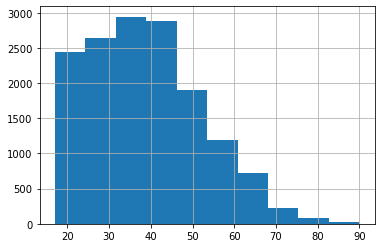

In [104]:
# histogram of Ozone
test['age'].hist()

<AxesSubplot:>

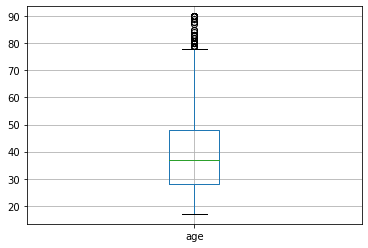

In [105]:
#Box plot
test.boxplot(column=['age'])

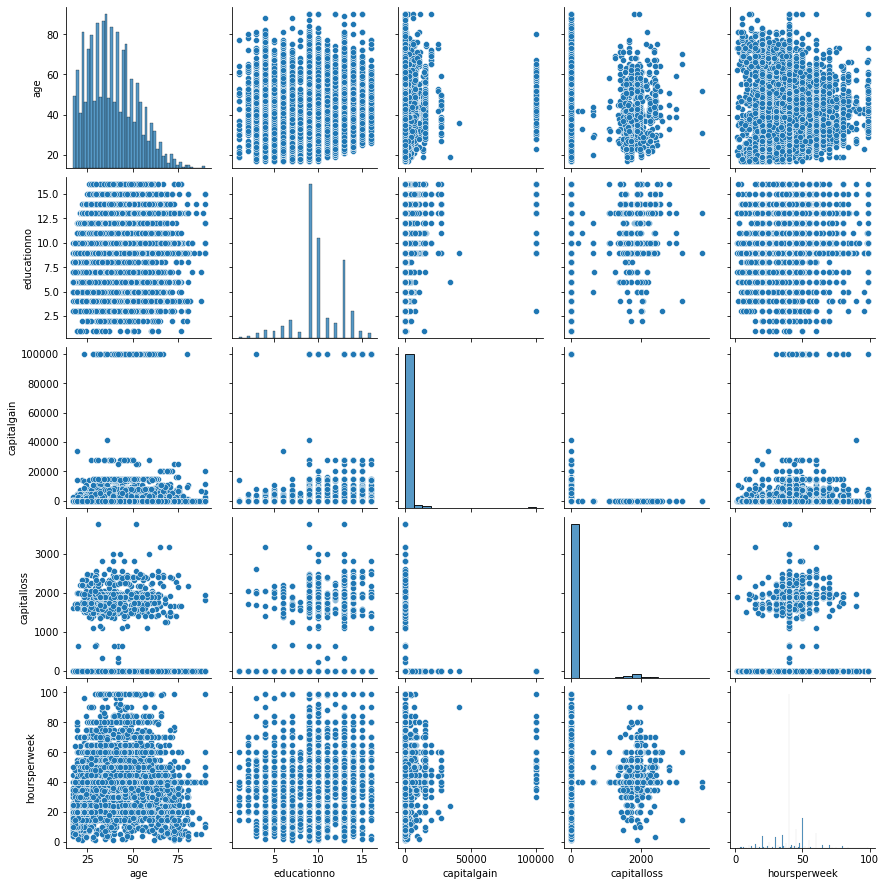

In [106]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(test)

In [107]:
test.isnull().sum() #information of the data set 

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [109]:
test1 = test.drop(["age","workclass","education","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","native"],axis=1)
test1.head()

,educationno,Salary
0,7,<=50K
1,9,<=50K
2,12,>50K
3,10,>50K
4,6,<=50K


In [110]:
train1 = train.drop(["age", "workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek", "native"],axis=1)
train1.head()

,educationno,Salary
0,13,<=50K
1,13,<=50K
2,9,<=50K
3,7,<=50K
4,13,<=50K


In [111]:
test1.head()

,educationno,Salary
0,7,<=50K
1,9,<=50K
2,12,>50K
3,10,>50K
4,6,<=50K


In [112]:
train1.head()

,educationno,Salary
0,13,<=50K
1,13,<=50K
2,9,<=50K
3,7,<=50K
4,13,<=50K


In [113]:
from sklearn.model_selection import train_test_split

Salary_train,Salary_test = train_test_split(test1,test_size=0.3)

In [114]:
#from sklearn.model_selection import train_test_split

#Salary_train,Salary_test = train_test_split(train1,test_size=0.3)

In [115]:
Salary_train

,educationno,Salary
4258,10,<=50K
9792,9,>50K
5534,5,<=50K
2517,13,<=50K
10952,14,<=50K
...,...,...
3212,11,<=50K
1727,9,<=50K
12094,5,<=50K
7797,10,<=50K


In [116]:
Salary_test

,educationno,Salary
3668,11,<=50K
8539,9,<=50K
3409,10,<=50K
469,9,<=50K
293,9,>50K
...,...,...
2684,12,>50K
14384,13,<=50K
1427,8,<=50K
5336,9,<=50K


In [117]:
def split_into_words(i):
    return (i.split(" "))


In [118]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [119]:
data_bow = CountVectorizer(analyzer=split_into_words).fit(test1.Salary)

In [120]:
data_bow

CountVectorizer(analyzer=<function split_into_words at 0x000001EB01161940>)

In [121]:
# For all messages
all_data_matrix = data_bow.transform(test1.Salary)
all_data_matrix.shape 

(15060, 3)

In [122]:
# For training messages
train1_data_matrix = data_bow.transform(Salary_train.Salary)
train1_data_matrix.shape # 

# For testing messages
test1_data_matrix = data_bow.transform(Salary_test.Salary)
test1_data_matrix.shape # 

(4518, 3)

In [123]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train1_data_matrix,Salary_train.Salary)
train_pred_m = classifier_mb.predict(train1_data_matrix)
accuracy_train_m = np.mean(train_pred_m==Salary_train.Salary) # 98%

test_pred_m = classifier_mb.predict(test1_data_matrix)
accuracy_test_m = np.mean(test_pred_m==Salary_test.Salary) # 96%



In [124]:
accuracy_train_m

1.0

In [125]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train1_data_matrix.toarray(),Salary_train.Salary.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train1_data_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==Salary_train.Salary) 

test_pred_g = classifier_gb.predict(test1_data_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==Salary_test.Salary) 

In [126]:
accuracy_train_g

1.0

In [127]:
from sklearn.model_selection import train_test_split

Salary_train1,Salary_test1 = train_test_split(train1,test_size=0.3)

In [128]:
def split_into_words(i):
    return (i.split(" "))


In [129]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [135]:
data1_bow = CountVectorizer(analyzer=split_into_words).fit(train1.Salary)

In [137]:
data1_bow

CountVectorizer(analyzer=<function split_into_words at 0x000001EB011618B0>)

In [139]:
# For all messages
all_data_matrix = data1_bow.transform(train1.Salary)
all_data_matrix.shape 

(30161, 3)

In [141]:
# For training messages
train1_data_matrix = data1_bow.transform(Salary_train1.Salary)
train1_data_matrix.shape # 

# For testing messages
test1_data_matrix = data1_bow.transform(Salary_test1.Salary)
test1_data_matrix.shape # 

(9049, 3)

In [148]:
train1_data_matrix.shape

(21112, 3)

In [142]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train1_data_matrix,Salary_train1.Salary)
train_pred_m = classifier_mb.predict(train1_data_matrix)
accuracy_train_m = np.mean(train_pred_m==Salary_train1.Salary) # 98%

test_pred_m = classifier_mb.predict(test1_data_matrix)
accuracy_test_m = np.mean(test_pred_m==Salary_test1.Salary) # 96%



In [147]:
test_pred_m

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [143]:
accuracy_train_m

1.0

In [144]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(train1_data_matrix.toarray(),Salary_train1.Salary.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train1_data_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==Salary_train1.Salary) 

test_pred_g = classifier_gb.predict(test1_data_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==Salary_test1.Salary) 

In [145]:
test_pred_g

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [146]:
accuracy_test_g

1.0